![SolasAI Banner Image](../images/SolasAI-Logo.png)

<br>

# SolasAI Disparity Calculations

In [1]:
import solas_disparity as sd
import pandas as pd

Certain notebook environments have limited rendering functionality.
Uncomment this cell as a potential workaround if plots are not
displaying.

In [2]:
# import plotly.io as pio
# pio.renderers.default = "png"

It's preferable to explicitly and specifically handle warnings. For the
purposes of this notebook, we will filter out all warnings.

In [3]:
from warnings import simplefilter
simplefilter("ignore")

Some predictions were created using a tree model run on an HMDA dataset.

In [4]:
label = "Interest Rate"
data = pd.read_parquet("data/hmda_test.parquet")

Store commonly reused function arguments.

In [5]:
protected_groups = ["Black", "Asian", "Native American", "Hispanic", "Female"]
reference_groups = ["White", "White", "White", "Non-Hispanic", "Male"]
groups = sd.pgrg_ordered(
    protected_groups=protected_groups,
    reference_groups=reference_groups,
)
reused_arguments = dict(
    group_data=data[groups],
    protected_groups=protected_groups,
    reference_groups=reference_groups,
    group_categories=["Race", "Race", "Race", "Ethnicity", "Sex"],
    sample_weight=None,
)
binary_outcome = data["Prediction"] <= data["Prediction"].quantile(0.5)
binary_label = data[label] <= data[label].quantile(0.5)

## Adverse Impact Ratio (AIR)

In [6]:
air = sd.adverse_impact_ratio(
    outcome=binary_outcome,
    air_threshold=0.8,
    percent_difference_threshold=0.0,
    **reused_arguments,
)

## Disparity Calculation: Adverse Impact Ratio

┌───────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────┐
│ Protected Groups                          │ Black, Asian, Native American, Hispanic, Female                     │
│ Reference Groups                          │ White, White, White, Non-Hispanic, Male                             │
│ Group Categories                          │ Race, Race, Race, Ethnicity, Sex                                    │
│ AIR Threshold                             │ 0.8                                                                 │
│ Percent Difference Threshold              │ 0.0                                                                 │
│ Shortfall Method                          │ to_reference_mean                                                   │
│ Affected Groups                           │ Hispanic                                                            │
│ Affected Reference                        │ Non-Hispanic                                                        │
│ Affected Categories                       │ Ethnicity                                                           │
└───────────────────────────────────────────┴─────────────────────────────────────────────────────────────────────┘

## Adverse Impact Ratio Summary Table

\* Percent Missing: Ethnicity: 13.68%, Race: 13.56%, Sex: 46.88%

Group,Reference Group,Group Category,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Black,White,Race,340.0,141.0,41.47%,9.70%,0.810,0.001,No,
Asian,White,Race,327.0,243.0,74.31%,-23.14%,1.452,0.000,No,
Native American,White,Race,20.0,9.0,45.00%,6.17%,0.879,0.657,No,
White,,Race,"3,623.0","1,854.0",51.17%,,,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,167.0,32.87%,21.54%,0.604,0.000,Yes,109.4
Non-Hispanic,,Ethnicity,"3,808.0","2,072.0",54.41%,,,,,
Female,Male,Sex,"1,034.0",414.0,40.04%,9.78%,0.804,0.000,No,
Male,,Sex,"1,622.0",808.0,49.82%,,,,,


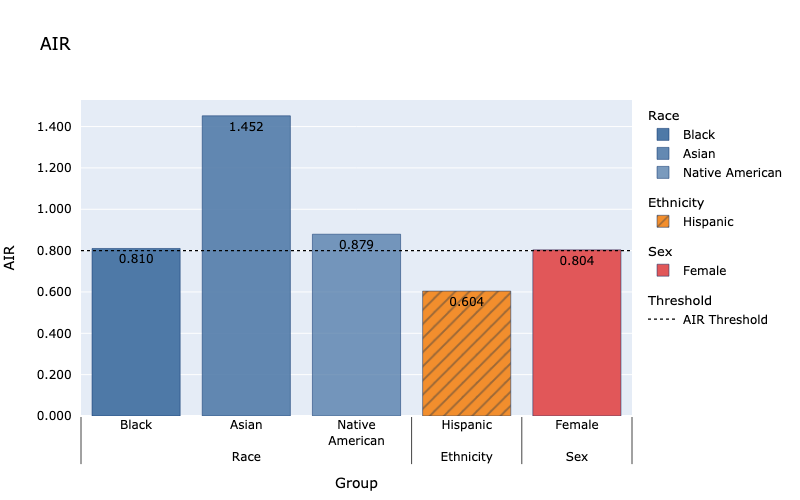

In [7]:
air

## Standardized Mean Difference (SMD)

In [8]:
smd = sd.standardized_mean_difference(
    outcome=data["Prediction"],
    label=data[label],
    smd_threshold=30,
    lower_score_favorable=True,
    **reused_arguments,
)

## Disparity Calculation: Standardized Mean Difference

┌────────────────────────────────────┬────────────────────────────────────────────────────────────────────────────┐
│ Protected Groups                   │ Black, Asian, Native American, Hispanic, Female                            │
│ Reference Groups                   │ White, White, White, Non-Hispanic, Male                                    │
│ Group Categories                   │ Race, Race, Race, Ethnicity, Sex                                           │
│ SMD Threshold                      │ 30.0                                                                       │
│ SMD Denominator                    │ population                                                                 │
│ Lower Score Favorable              │ True                                                                       │
│ Affected Groups                    │ Hispanic                                                                   │
│ Affected Reference                 │ Non-Hispanic                                                               │
│ Affected Categories                │ Ethnicity                                                                  │
└────────────────────────────────────┴────────────────────────────────────────────────────────────────────────────┘

## Standardized Mean Difference Summary Table

\* Percent Missing: Ethnicity: 13.68%, Race: 13.56%, Sex: 46.88%

Group,Reference Group,Group Category,Total,Average Label,Average Outcome,Difference in Average Outcome,Std. Dev. of Outcomes,SMD,P-Values,Practically Significant
Black,White,Race,340.0,0.05,0.05,0.000653,0.00,27.559,0.000,No
Asian,White,Race,327.0,0.04,0.05,-0.001668,0.00,-70.355,0.000,No
Native American,White,Race,20.0,0.05,0.05,0.000655,0.00,27.617,0.199,No
White,,Race,"3,623.0",0.05,0.05,,0.00,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,0.05,0.05,0.001032,0.00,43.545,0.000,Yes
Non-Hispanic,,Ethnicity,"3,808.0",0.05,0.05,,0.00,,,
Female,Male,Sex,"1,034.0",0.05,0.05,0.000395,0.00,16.655,0.000,No
Male,,Sex,"1,622.0",0.05,0.05,,0.00,,,


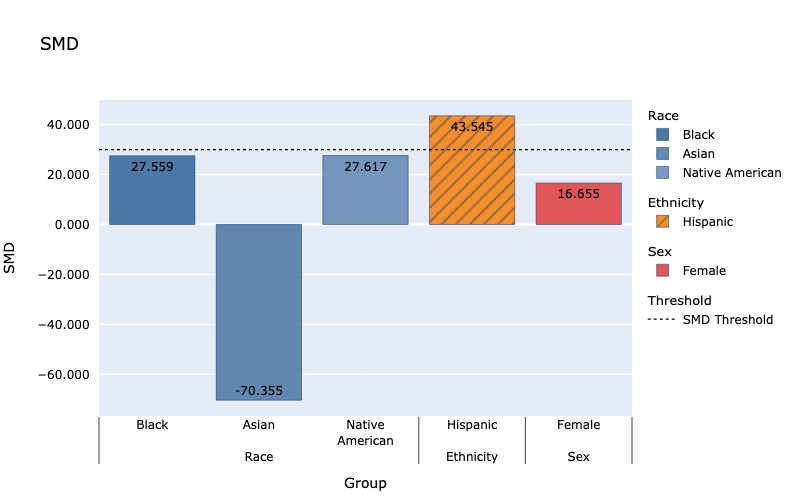

In [9]:
smd

## Adverse Impact Ratio by Quantile

In [10]:
airq = sd.adverse_impact_ratio_by_quantile(
    outcome=data["Prediction"],
    air_threshold=0.8,
    percent_difference_threshold=0.0,
    quantiles=[decile / 10 for decile in range(1, 11)],
    lower_score_favorable=True,
    **reused_arguments,
)

## Disparity Calculation: Adverse Impact Ratio By Quantile

┌───────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────┐
│ Protected Groups                          │ Black, Asian, Native American, Hispanic, Female                     │
│ Reference Groups                          │ White, White, White, Non-Hispanic, Male                             │
│ Group Categories                          │ Race, Race, Race, Ethnicity, Sex                                    │
│ AIR Threshold                             │ 0.8                                                                 │
│ Percent Difference Threshold              │ 0.0                                                                 │
│ Lower Score Favorable                     │ True                                                                │
│ Affected Groups                           │ Black, Hispanic, Female                                             │
│ Affected Reference                        │ White, Non-Hispanic, Male                                           │
│ Affected Categories                       │ Race, Ethnicity, Sex                                                │
└───────────────────────────────────────────┴─────────────────────────────────────────────────────────────────────┘

## Adverse Impact Ratio By Quantile Summary Table

Group,Quantile,Reference Group,Group Category,Quantile Cutoff,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant
Black,10.0%,White,Race,0.044761,"4,322",13.56%,340.0,13.0,3.82%,4.93%,0.437,0.001,Yes
Asian,10.0%,White,Race,0.044761,"4,322",13.56%,327.0,91.0,27.83%,-19.08%,3.181,0.000,No
Native American,10.0%,White,Race,0.044761,"4,322",13.56%,20.0,1.0,5.00%,3.75%,0.571,1.000,No
White,10.0%,,Race,0.044761,"4,322",13.56%,"3,623.0",317.0,8.75%,,,,
Hispanic,10.0%,Non-Hispanic,Ethnicity,0.044761,"4,316",13.68%,508.0,15.0,2.95%,7.79%,0.275,0.000,Yes
Non-Hispanic,10.0%,,Ethnicity,0.044761,"4,316",13.68%,"3,808.0",409.0,10.74%,,,,
Female,10.0%,Male,Sex,0.044761,"2,656",46.88%,"1,034.0",66.0,6.38%,3.05%,0.677,0.006,Yes
Male,10.0%,,Sex,0.044761,"2,656",46.88%,"1,622.0",153.0,9.43%,,,,
Black,20.0%,White,Race,0.045863,"4,322",13.56%,340.0,37.0,10.88%,9.85%,0.525,0.000,Yes
Asian,20.0%,White,Race,0.045863,"4,322",13.56%,327.0,132.0,40.37%,-19.64%,1.947,0.000,No


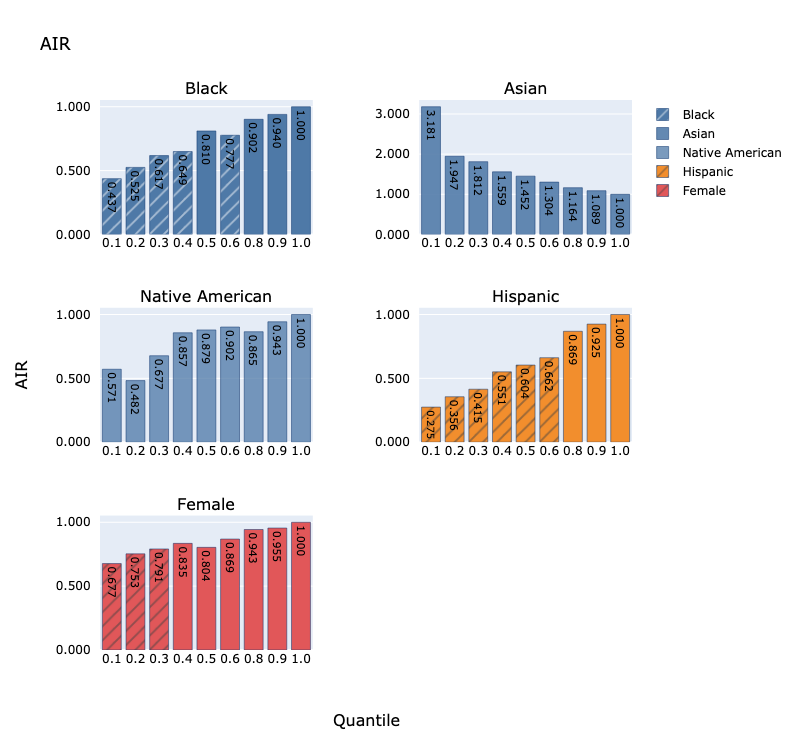

In [11]:
airq

## Odds Ratio

In [12]:
odds_ratio = sd.odds_ratio(
    outcome=binary_outcome,
    odds_ratio_threshold=0.68,
    percent_difference_threshold=0.0,
    **reused_arguments,
)

## Disparity Calculation: Odds Ratio

┌───────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────┐
│ Protected Groups                          │ Black, Asian, Native American, Hispanic, Female                     │
│ Reference Groups                          │ White, White, White, Non-Hispanic, Male                             │
│ Group Categories                          │ Race, Race, Race, Ethnicity, Sex                                    │
│ Odds Ratio Threshold                      │ 0.68                                                                │
│ Percent Difference Threshold              │ 0.0                                                                 │
│ Lower Score Favorable                     │ True                                                                │
│ Affected Groups                           │ Black, Hispanic, Female                                             │
│ Affected Reference                        │ White, Non-Hispanic, Male                                           │
│ Affected Categories                       │ Race, Ethnicity, Sex                                                │
└───────────────────────────────────────────┴─────────────────────────────────────────────────────────────────────┘

## Odds Ratio Summary Table

\* Percent Missing: Ethnicity: 13.68%, Race: 13.56%, Sex: 46.88%

Group,Reference Group,Group Category,Total,Favorable,Percent Favorable,Odds,Percent Difference Favorable,Odds Ratio,P-Values,Practically Significant
Black,White,Race,340.0,141.0,41.47%,0.708543,9.70%,0.676058,0.001,Yes
Asian,White,Race,327.0,243.0,74.31%,2.892857,-23.14%,2.760229,0.000,No
Native American,White,Race,20.0,9.0,45.00%,0.818182,6.17%,0.780671,0.657,No
White,,Race,"3,623.0","1,854.0",51.17%,1.048050,,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,167.0,32.87%,0.489736,21.54%,0.410319,0.000,Yes
Non-Hispanic,,Ethnicity,"3,808.0","2,072.0",54.41%,1.193548,,,,
Female,Male,Sex,"1,034.0",414.0,40.04%,0.667742,9.78%,0.672700,0.000,Yes
Male,,Sex,"1,622.0",808.0,49.82%,0.992629,,,,


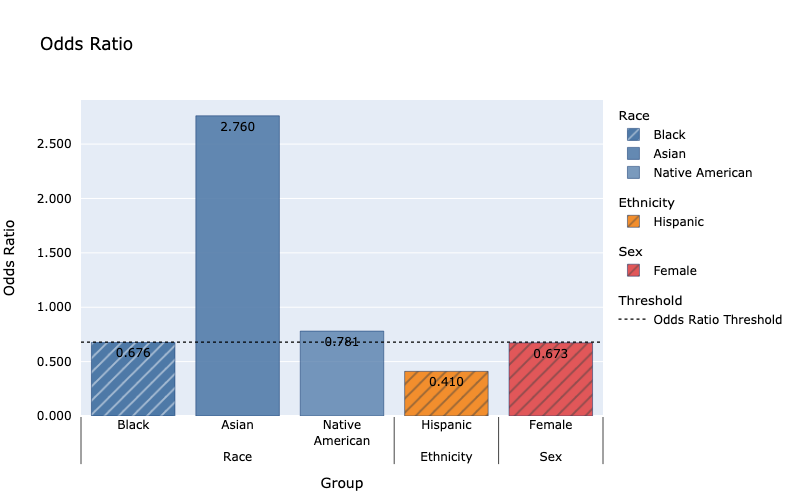

In [13]:
odds_ratio

## Categorical Adverse Impact Ratio

In [14]:
# Generate an example categorical outcome.
categorical_outcome = pd.qcut(data["Prediction"], q=[0.0, 0.25, 0.5, 0.75, 1.0])
categories = categorical_outcome.cat.categories.to_series()
categories = pd.Series(["Best", "Great", "Good", "Bad"], index=categories.index)
categorical_outcome.replace(categories.to_dict(), inplace=True)

In [15]:
cair = sd.categorical_adverse_impact_ratio(
    outcome=categorical_outcome,
    category_order=list(reversed(categories.tolist())),
    air_threshold=0.8,
    percent_difference_threshold=0.0,
    **reused_arguments,
)

## Disparity Calculation: Categorical Adverse Impact Ratio

┌───────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────┐
│ Protected Groups                          │ Black, Asian, Native American, Hispanic, Female                     │
│ Reference Groups                          │ White, White, White, Non-Hispanic, Male                             │
│ Group Categories                          │ Race, Race, Race, Ethnicity, Sex                                    │
│ AIR Threshold                             │ 0.8                                                                 │
│ Percent Difference Threshold              │ 0.0                                                                 │
│ Affected Groups                           │ Hispanic, Black, Female                                             │
│ Affected Reference                        │ Non-Hispanic, White, Male                                           │
│ Affected Categories                       │ Ethnicity, Race, Sex                                                │
└───────────────────────────────────────────┴─────────────────────────────────────────────────────────────────────┘

## Categorical Adverse Impact Ratio Summary Table

Group,Category,Reference Group,Group Category,Ordinal,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant
Black,Bad,White,Race,0,"4,322",13.56%,340.0,340.0,100.00%,0.00%,1.000,1.000,No
Asian,Bad,White,Race,0,"4,322",13.56%,327.0,327.0,100.00%,0.00%,1.000,1.000,No
Native American,Bad,White,Race,0,"4,322",13.56%,20.0,20.0,100.00%,0.00%,1.000,1.000,No
White,Bad,,Race,0,"4,322",13.56%,"3,623.0","3,623.0",100.00%,,,,
Hispanic,Bad,Non-Hispanic,Ethnicity,0,"4,316",13.68%,508.0,508.0,100.00%,0.00%,1.000,1.000,No
Non-Hispanic,Bad,,Ethnicity,0,"4,316",13.68%,"3,808.0","3,808.0",100.00%,,,,
Female,Bad,Male,Sex,0,"2,656",46.88%,"1,034.0","1,034.0",100.00%,0.00%,1.000,1.000,No
Male,Bad,,Sex,0,"2,656",46.88%,"1,622.0","1,622.0",100.00%,,,,
Black,Good,White,Race,1,"4,322",13.56%,340.0,248.0,72.94%,7.96%,0.902,0.001,No
Asian,Good,White,Race,1,"4,322",13.56%,327.0,308.0,94.19%,-13.29%,1.164,0.000,No


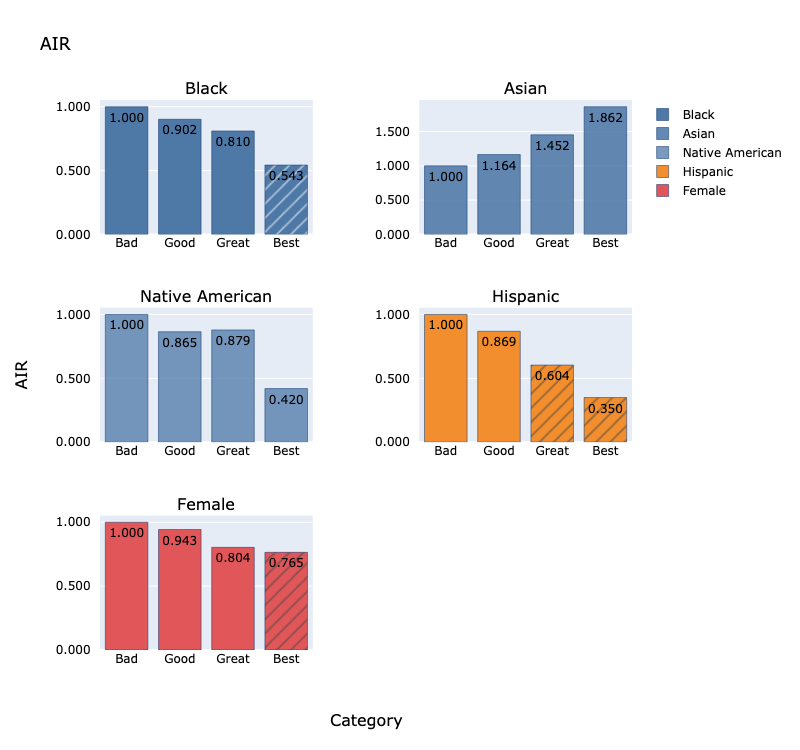

In [16]:
cair

## Residual Standardized Mean Difference

In [17]:
rsmd = sd.residual_standardized_mean_difference(
    prediction=data["Prediction"],
    label=data[label],
    residual_smd_threshold=30,
    lower_score_favorable=True,
    **reused_arguments,
)

## Disparity Calculation: Residual Standardized Mean Difference

┌───────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Protected Groups                      │ Black, Asian, Native American, Hispanic, Female                         │
│ Reference Groups                      │ White, White, White, Non-Hispanic, Male                                 │
│ Group Categories                      │ Race, Race, Race, Ethnicity, Sex                                        │
│ Residual SMD Threshold                │ 30.0                                                                    │
│ Residual SMD Denominator              │ population                                                              │
│ Lower Score Favorable                 │ True                                                                    │
│ Affected Groups                       │                                                                         │
│ Affected Reference                    │                                                                         │
│ Affected Categories                   │                                                                         │
└───────────────────────────────────────┴─────────────────────────────────────────────────────────────────────────┘

## Residual Standardized Mean Difference Summary Table

\* Percent Missing: Ethnicity: 13.68%, Race: 13.56%, Sex: 46.88%

Group,Reference Group,Group Category,Total,Average Prediction,Average Label,Average Residual,Difference in Average Residual,Std. Dev. of Residuals,Residual SMD,P-Values,Practically Significant
Black,White,Race,340.0,0.047486,0.05,0.000472,0.000265,0.004864,5.445415,0.337,No
Asian,White,Race,327.0,0.045165,0.04,-0.000769,-0.000976,0.004864,-20.069038,0.000,No
Native American,White,Race,20.0,0.047487,0.05,0.000628,0.000421,0.004864,8.646488,0.699,No
White,,Race,"3,623.0",0.046833,0.05,0.000207,,0.004864,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,0.047667,0.05,0.001097,0.001046,0.004864,21.513889,0.000,No
Non-Hispanic,,Ethnicity,"3,808.0",0.046634,0.05,0.000051,,0.004864,,,
Female,Male,Sex,"1,034.0",0.047268,0.05,0.000435,0.000246,0.004864,5.047722,0.229,No
Male,,Sex,"1,622.0",0.046873,0.05,0.000189,,0.004864,,,


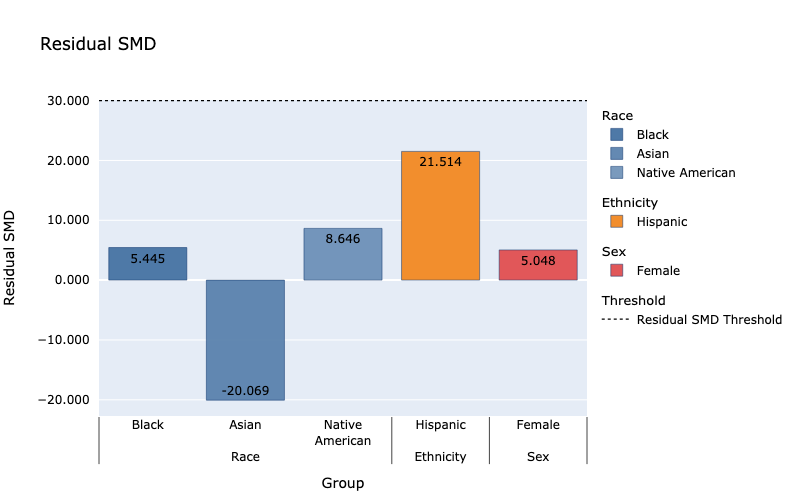

In [18]:
rsmd

## Segmented Adverse Impact Ratio

In [19]:
# Generate example income segments.
segments = pd.qcut(data["Income"], q=[0.0, 1 / 3, 2 / 3, 1.0])
categories = segments.cat.categories.to_series()
categories = pd.Series(
    ["Low Income", "Mid Income", "High Income"], index=categories.index
)
segments.replace(categories.to_dict(), inplace=True)

In [20]:
sair = sd.segmented_adverse_impact_ratio(
    outcome=binary_outcome,
    air_threshold=0.8,
    percent_difference_threshold=0.0,
    fdr_threshold=0.2,
    segment=segments,
    **reused_arguments,
)

## Disparity Calculation: Segmented Adverse Impact Ratio

┌───────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────┐
│ Protected Groups                          │ Black, Asian, Native American, Hispanic, Female                     │
│ Reference Groups                          │ White, White, White, Non-Hispanic, Male                             │
│ Group Categories                          │ Race, Race, Race, Ethnicity, Sex                                    │
│ AIR Threshold                             │ 0.8                                                                 │
│ Percent Difference Threshold              │ 0.0                                                                 │
│ FDR Threshold                             │ 0.2                                                                 │
│ Affected Groups                           │ Hispanic                                                            │
│ Affected Reference                        │ Non-Hispanic                                                        │
│ Affected Categories                       │ Ethnicity                                                           │
└───────────────────────────────────────────┴─────────────────────────────────────────────────────────────────────┘

## Segmented Adverse Impact Ratio Summary Table

Group,Segment,Reference Group,Group Category,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,BH Critical Value,Practically Significant
Black,Low Income,White,Race,"1,510",11.80%,151.0,33.0,21.85%,4.18%,0.839,0.280,,No
Black,Mid Income,White,Race,"1,414",13.14%,117.0,56.0,47.86%,5.02%,0.905,0.332,,No
Black,High Income,White,Race,"1,398",15.78%,72.0,52.0,72.22%,5.15%,0.933,0.313,,No
Asian,Low Income,White,Race,"1,510",11.80%,69.0,22.0,31.88%,-5.85%,1.225,0.325,,No
Asian,Mid Income,White,Race,"1,414",13.14%,89.0,67.0,75.28%,-22.39%,1.423,0.000,,No
Asian,High Income,White,Race,"1,398",15.78%,169.0,154.0,91.12%,-13.75%,1.178,0.000,,No
Native American,Low Income,White,Race,"1,510",11.80%,9.0,3.0,33.33%,-7.30%,1.280,0.704,,No
Native American,Mid Income,White,Race,"1,414",13.14%,6.0,4.0,66.67%,-13.78%,1.261,0.690,,No
Native American,High Income,White,Race,"1,398",15.78%,5.0,2.0,40.00%,37.37%,0.517,0.081,,No
White,Low Income,,Race,"1,510",11.80%,"1,279.0",333.0,26.04%,,,,,


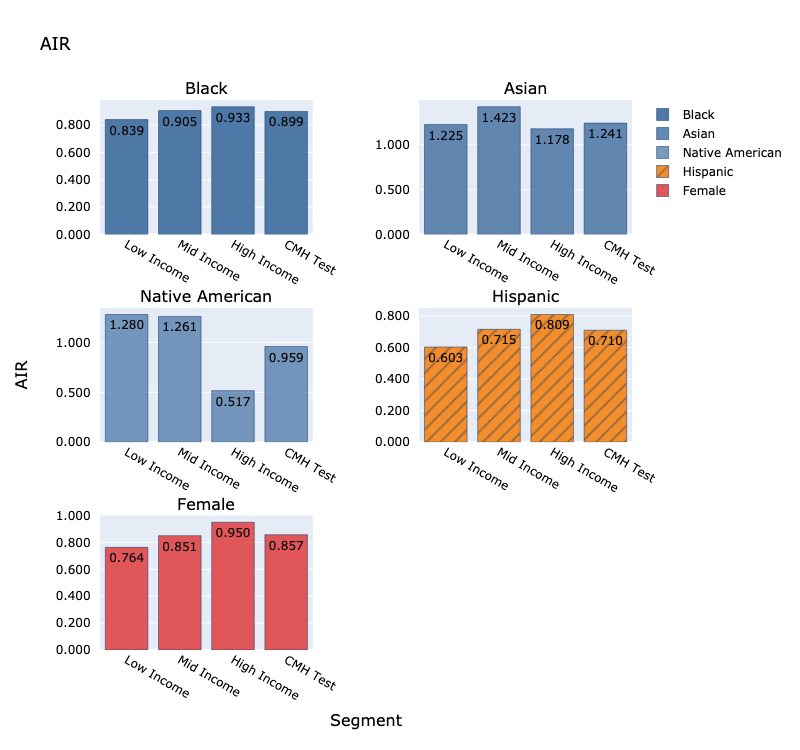

In [21]:
sair

## Custom Disparity Metric

We can recreate the AIR as an example of how custom disparity metrics
can be used. Many more advanced disparity metrics can benefit from the
framework and additional validation provided by the custom disparity
metric interface.

In [22]:
# Define a function for calculating perecent favorable.
def percent_favorable(outcome, sample_weight):
    return (outcome.mul(sample_weight, axis=0)).sum(
        axis=0, min_count=1
    ) / sample_weight.sum(axis=0, min_count=1)

## Disparity Calculation: Custom Disparity Metric

┌─────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────┐
│ Protected Groups                    │ Black, Asian, Native American, Hispanic, Female                           │
│ Reference Groups                    │ White, White, White, Non-Hispanic, Male                                   │
│ Group Categories                    │ Race, Race, Race, Ethnicity, Sex                                          │
│ Metric                              │ percent_favorable                                                         │
│ Difference Calculation              │ reference_minus_protected                                                 │
│ Ratio Calculation                   │ protected_over_reference                                                  │
│ Affected Groups                     │ Black, Hispanic, Female                                                   │
│ Affected Reference                  │ White, Non-Hispanic, Male                                                 │
│ Affected Categories                 │ Race, Ethnicity, Sex                                                      │
└─────────────────────────────────────┴───────────────────────────────────────────────────────────────────────────┘

## Custom Disparity Metric Summary Table

\* Percent Missing: Ethnicity: 13.68%, Race: 13.56%, Sex: 46.88%

Group,Reference Group,Group Category,Total,PERCENT FAVORABLE,Difference,Ratio,P-Values,Practically Significant
Black,White,Race,340.0,0.414706,0.097,0.810,0.001,Yes
Asian,White,Race,327.0,0.743119,-0.231,1.452,0.000,No
Native American,White,Race,20.0,0.450000,0.062,0.879,0.657,No
White,,Race,"3,623.0",0.511731,,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,0.328740,0.215,0.604,0.000,Yes
Non-Hispanic,,Ethnicity,"3,808.0",0.544118,,,,
Female,Male,Sex,"1,034.0",0.400387,0.098,0.804,0.000,Yes
Male,,Sex,"1,622.0",0.498150,,,,


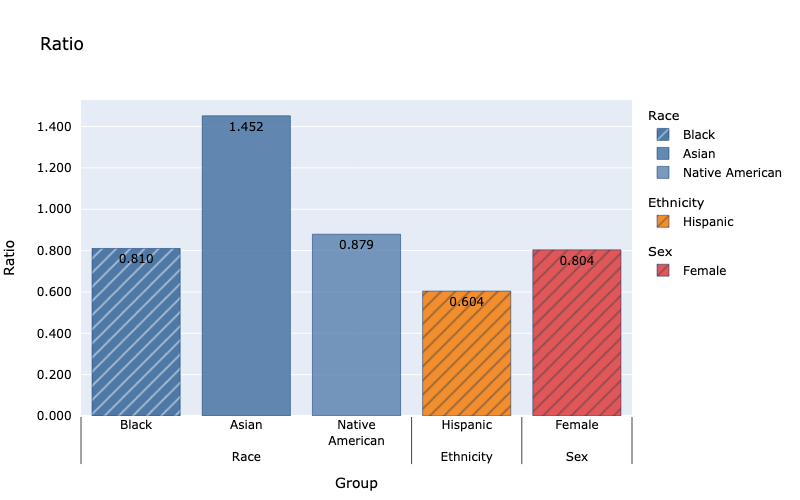

In [23]:
custom_air = sd.custom_disparity_metric(
    outcome=binary_outcome,
    metric=percent_favorable,
    difference_calculation=sd.types.DifferenceCalculation.REFERENCE_MINUS_PROTECTED,
    difference_threshold=lambda value: value > 0.0,
    ratio_calculation=sd.types.RatioCalculation.PROTECTED_OVER_REFERENCE,
    ratio_threshold=lambda value: value < 1.0,
    statistical_significance_test=sd.types.StatSigTest.FISHERS_OR_CHI_SQUARED,
    **reused_arguments,
)

custom_air

Note that the values from the custom disparity metric summary correspond
to those of the original AIR calculation.

In [24]:
pd.concat(
    (
        custom_air.summary_table["PERCENT FAVORABLE"],
        air.summary_table[sd.const.PERCENT_FAVORABLE],
    ),
    axis=1,
)

,PERCENT FAVORABLE,Percent Favorable
Group,,
Black,0.414706,0.414706
Asian,0.743119,0.743119
Native American,0.450000,0.450000
White,0.511731,0.511731
Hispanic,0.328740,0.328740
Non-Hispanic,0.544118,0.544118
Female,0.400387,0.400387
Male,0.498150,0.498150


In [25]:
pd.concat(
    (
        custom_air.summary_table[sd.const.RATIO],
        air.summary_table[sd.const.AIR_VALUES],
    ),
    axis=1,
)

,Ratio,AIR
Group,,
Black,0.810399,0.810399
Asian,1.452169,1.452169
Native American,0.879369,0.879369
White,NaN,NaN
Hispanic,0.604171,0.604171
Non-Hispanic,NaN,NaN
Female,0.803747,0.803747
Male,NaN,NaN


## Confusion Matrix Metrics

SolasAI-provides ready-made implementations of confusion matrix metrics
by wrapping around the custom disparity metric.

In [26]:
(
    sd.false_discovery_rate,
    sd.false_negative_rate,
    sd.false_positive_rate,
    sd.precision,
    sd.true_negative_rate,
    sd.true_positive_rate,
)

(<cyfunction false_discovery_rate at 0x1647a31e0>,
 <cyfunction false_negative_rate at 0x1647b16c0>,
 <cyfunction false_positive_rate at 0x16482bba0>,
 <cyfunction precision at 0x164849520>,
 <cyfunction true_negative_rate at 0x1648cd040>,
 <cyfunction true_positive_rate at 0x1648d5520>)

## Disparity Calculation: Precision

┌─────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────┐
│ Protected Groups                    │ Black, Asian, Native American, Hispanic, Female                           │
│ Reference Groups                    │ White, White, White, Non-Hispanic, Male                                   │
│ Group Categories                    │ Race, Race, Race, Ethnicity, Sex                                          │
│ Metric                              │ precision_score                                                           │
│ Difference Calculation              │ reference_minus_protected                                                 │
│ Difference Threshold                │ 0.0                                                                       │
│ Ratio Calculation                   │ protected_over_reference                                                  │
│ Ratio Threshold                     │ 1.0                                                                       │
│ Affected Groups                     │ Black, Native American, Hispanic, Female                                  │
│ Affected Reference                  │ White, White, Non-Hispanic, Male                                          │
│ Affected Categories                 │ Race, Race, Ethnicity, Sex                                                │
└─────────────────────────────────────┴───────────────────────────────────────────────────────────────────────────┘

## Precision Summary Table

\* Percent Missing: Ethnicity: 0.00%, Race: 0.00%, Sex: 0.00%

Group,Reference Group,Group Category,Total,Total Label,Average Label,PRECISION SCORE,Difference,Ratio,Practically Significant
Black,White,Race,340.0,139.0,0.41,0.511,0.105,0.829,Yes
Asian,White,Race,327.0,210.0,0.64,0.724,-0.108,1.176,No
Native American,White,Race,20.0,10.0,0.50,0.556,0.060,0.902,Yes
White,,Race,"3,623.0","1,809.0",0.50,0.616,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,200.0,0.39,0.563,0.069,0.891,Yes
Non-Hispanic,,Ethnicity,"3,808.0","1,976.0",0.52,0.632,,,
Female,Male,Sex,"1,034.0",451.0,0.44,0.560,0.063,0.898,Yes
Male,,Sex,"1,622.0",803.0,0.50,0.624,,,


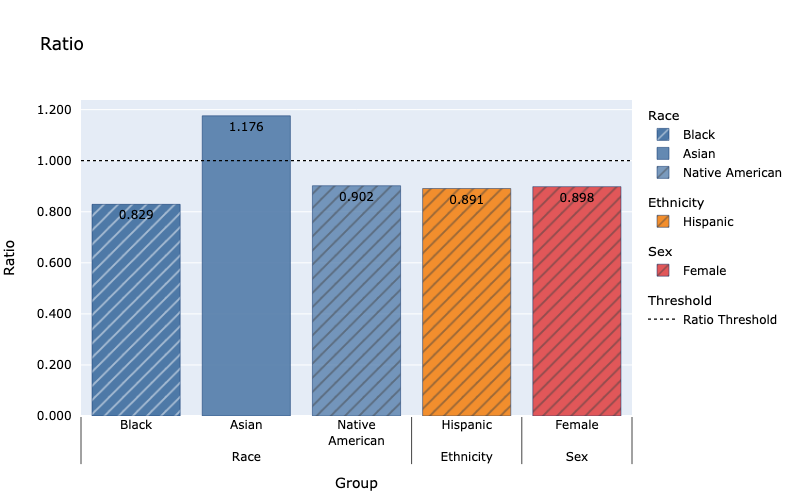

In [27]:
precision_arguments = reused_arguments.copy()
precision_arguments["group_data"] = precision_arguments["group_data"].fillna(0.0)
precision = sd.precision(
    outcome=binary_outcome,
    label=binary_label,
    ratio_threshold=1.0,
    difference_threshold=0.0,
    **precision_arguments,
)
precision

``sd.precision`` is essentially a convience wrapper for the
following call to the custom disparity metric.

## Disparity Calculation: Custom Disparity Metric

┌─────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────┐
│ Protected Groups                    │ Black, Asian, Native American, Hispanic, Female                           │
│ Reference Groups                    │ White, White, White, Non-Hispanic, Male                                   │
│ Group Categories                    │ Race, Race, Race, Ethnicity, Sex                                          │
│ Metric                              │ precision                                                                 │
│ Difference Calculation              │ reference_minus_protected                                                 │
│ Ratio Calculation                   │ protected_over_reference                                                  │
│ Affected Groups                     │                                                                           │
│ Affected Reference                  │                                                                           │
│ Affected Categories                 │                                                                           │
└─────────────────────────────────────┴───────────────────────────────────────────────────────────────────────────┘

## Custom Disparity Metric Summary Table

\* Percent Missing: Ethnicity: 0.00%, Race: 0.00%, Sex: 0.00%

Group,Reference Group,Group Category,Total,Total Label,Average Label,PRECISION,Difference,Ratio,P-Values,Practically Significant
Black,White,Race,340.0,139.0,0.41,0.510638,0.105,0.829,0.084,No
Asian,White,Race,327.0,210.0,0.64,0.724280,-0.108,1.176,0.018,No
Native American,White,Race,20.0,10.0,0.50,0.555556,0.060,0.902,,No
White,,Race,"3,623.0","1,809.0",0.50,0.615965,,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,200.0,0.39,0.562874,0.069,0.891,0.229,No
Non-Hispanic,,Ethnicity,"3,808.0","1,976.0",0.52,0.631757,,,,
Female,Male,Sex,"1,034.0",451.0,0.44,0.560386,0.063,0.898,0.114,No
Male,,Sex,"1,622.0",803.0,0.50,0.623762,,,,


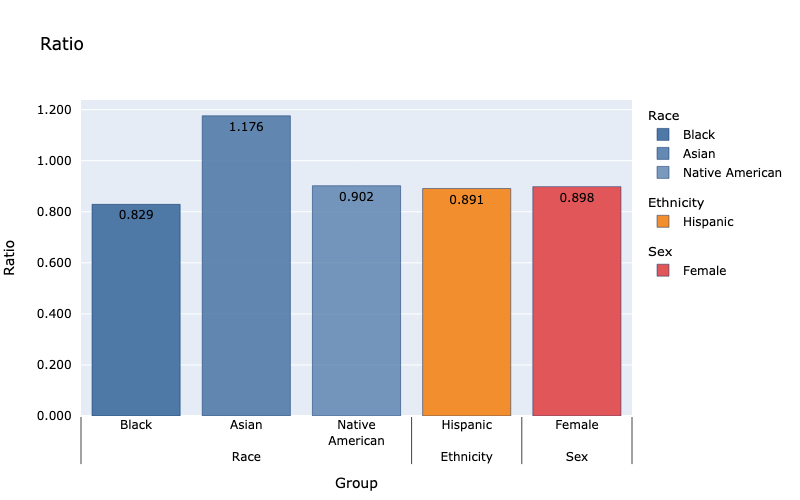

In [28]:
def precision(y_true, y_pred, sample_weight):
    from sklearn.metrics import confusion_matrix

    tn, fp, fn, tp = confusion_matrix(
        y_true=y_true,
        y_pred=y_pred,
        sample_weight=sample_weight,
    ).ravel()

    return tp / (tp + fp)


sd.custom_disparity_metric(
    outcome=binary_outcome,
    metric=precision,
    label=binary_label,
    difference_calculation=sd.types.DifferenceCalculation.REFERENCE_MINUS_PROTECTED,
    difference_threshold=lambda difference: difference > 0.0,
    ratio_calculation=sd.types.RatioCalculation.PROTECTED_OVER_REFERENCE,
    ratio_threshold=lambda ratio: ratio < 1.0,
    statistical_significance_test=sd.types.StatSigTest.BOOTSTRAPPING,
    p_value_threshold=0.05,
    **precision_arguments,
)

Additionally, statistical significance can be set to ``None`` for custom
disparity metrics, causing statistical significance calculations to be
skipped.

## Disparity Calculation: Custom Disparity Metric

┌─────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────┐
│ Protected Groups                    │ Black, Asian, Native American, Hispanic, Female                           │
│ Reference Groups                    │ White, White, White, Non-Hispanic, Male                                   │
│ Group Categories                    │ Race, Race, Race, Ethnicity, Sex                                          │
│ Metric                              │ precision                                                                 │
│ Difference Calculation              │ reference_minus_protected                                                 │
│ Ratio Calculation                   │ protected_over_reference                                                  │
│ Affected Groups                     │ Black, Native American, Hispanic, Female                                  │
│ Affected Reference                  │ White, White, Non-Hispanic, Male                                          │
│ Affected Categories                 │ Race, Race, Ethnicity, Sex                                                │
└─────────────────────────────────────┴───────────────────────────────────────────────────────────────────────────┘

## Custom Disparity Metric Summary Table

\* Percent Missing: Ethnicity: 0.00%, Race: 0.00%, Sex: 0.00%

Group,Reference Group,Group Category,Total,Total Label,Average Label,PRECISION,Difference,Ratio,Practically Significant
Black,White,Race,340.0,139.0,0.41,0.510638,0.105,0.829,Yes
Asian,White,Race,327.0,210.0,0.64,0.724280,-0.108,1.176,No
Native American,White,Race,20.0,10.0,0.50,0.555556,0.060,0.902,Yes
White,,Race,"3,623.0","1,809.0",0.50,0.615965,,,
Hispanic,Non-Hispanic,Ethnicity,508.0,200.0,0.39,0.562874,0.069,0.891,Yes
Non-Hispanic,,Ethnicity,"3,808.0","1,976.0",0.52,0.631757,,,
Female,Male,Sex,"1,034.0",451.0,0.44,0.560386,0.063,0.898,Yes
Male,,Sex,"1,622.0",803.0,0.50,0.623762,,,


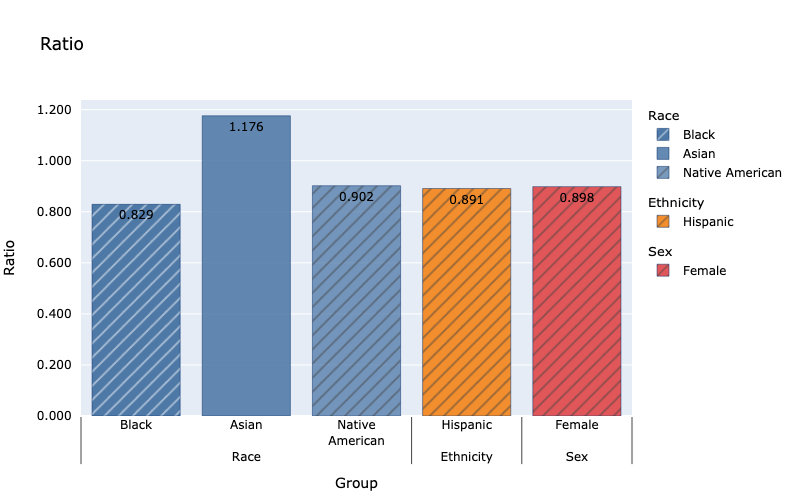

In [29]:
sd.custom_disparity_metric(
    outcome=binary_outcome,
    metric=precision,
    label=binary_label,
    difference_calculation=sd.types.DifferenceCalculation.REFERENCE_MINUS_PROTECTED,
    difference_threshold=lambda difference: difference > 0.0,
    ratio_calculation=sd.types.RatioCalculation.PROTECTED_OVER_REFERENCE,
    ratio_threshold=lambda ratio: ratio < 1.0,
    statistical_significance_test=None,
    p_value_threshold=0.05,
    **precision_arguments,
)